# Quantitative Analysis Project

## Samruth Vennapusala


# Change of ETF return and the Price of Gold, Crude Oil and JP Morgan Stock

## Part 1: Meet the data
Data description – This data includes four columns/random variables: the daily ETF return; the daily relative change in the price of the crude oil; the daily relative change in the gold price; and the daily return of the JPMorgan Chase & Co stock. The sample size is 1000.
Requirements – Use any software to obtain the sample mean and sample standard deviation for each random variable (column) of the data; the sample correlations among each pair of the four random variables (columns) of the data.

In [1]:
# Install Packages
#pip install mapie
#pip install bioinfokit

In [2]:
# Import Packages
import pandas as pd
import numpy as np
#from numpy import sum as arraysum
#from numpy import sqrt
#from numpy import mean
#from numpy import std
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import sklearn.metrics

#from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from IPython.display import display
from mapie.estimators import MapieRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression



In [3]:
%matplotlib inline  
plt.style.use('fivethirtyeight')


In [4]:
run_major_functions = True


In [5]:
# Functions
def compare_p_to_alpha(p, alpha = 0.05, category = ""):
    '''
    Based on p value and alpha, will either reject or fail to reject the null hypothesis

    Parameters
    ----------
    p : float
        p_value.
    alpha : float, optional
        alpha value for confidence level. The default is 0.05.
    category : str, optional
        The cateogory mean for the test. The default is "".

    Returns
    -------
    None.

    '''
    if category != "":
        data_print = f'\n\tCategory: {category}, p_value: {p}, alpha: {alpha}'
    else:
        data_print = f'\n\tp_value: {p}, alpha: {alpha}'
        
    response = "Conclusion: "
    if p > alpha:
        solution = 'Fail to reject the null hypothesis (H_0)'
    else:
        solution = 'Reject the null hypotheis (H_0)'
        
    response = response + solution + data_print
    print(response)
    return None


In [6]:
# Load Data
data_path = r'./data/the data for your group project_MA541 (MA 541A).xlsx'
#data_path = r'C:/Users/samru/Desktop/Project_Team/Project_Team/data/the data for your group project_MA541 (MA 541A).xlsx'
excel_sheet_name = 'Sheet1'
df = pd.read_excel (data_path, sheet_name= excel_sheet_name)

In [7]:
# Information
data_info = {}
data_info['data'] = df

                
# Sample Mean and Std
sample_means = df.mean().rename("sample_mean")
sample_stds = df.std().rename("sample_std")
df_sample =  pd.concat([sample_means, sample_stds], axis=1)
#df_sample.columns = ['sample_mean', 'sample_std']
data_info['Sample'] = df_sample


# Covariance
data_cov = {}
for col1 in df.columns:
    data_cov[col1] = {}
    for col2 in df.columns:
        covariance = np.cov(df.loc[:, col1], df.loc[:, col2])
        data_cov[col1][col2] = covariance[0][-1]
    
df_cov = pd.DataFrame(data_cov).transpose()
data_info['Covaraince'] = df_cov



# calculate Pearson's correlation
data_pear_corr = {}
for col1 in df.columns:
    data_pear_corr[col1] = {}
    for col2 in df.columns:
        corr, _ = scipy.stats.pearsonr(df.loc[:, col1], df.loc[:, col2])
        #print('Pearsons correlation: %.3f' % corr)
        data_pear_corr[col1][col2] = corr
    
df_pear_corr = pd.DataFrame(data_pear_corr).transpose()
data_info['Pearon Correlation'] = df_pear_corr




In [8]:
print(f"\n\nThe sample mean and standard deviation:\n {data_info['Sample']}")



The sample mean and standard deviation:
            sample_mean  sample_std
Close_ETF   121.152960   12.569790
oil           0.001030    0.021093
gold          0.000663    0.011289
JPM           0.000530    0.011017


In [9]:
print(f"\n\nThe Covariance:\n {data_info['Covaraince']}")
print(f"\n\nThe Pearson Correlation:\n {data_info['Pearon Correlation']}")



The Covariance:
             Close_ETF       oil      gold       JPM
Close_ETF  157.999629 -0.002398  0.003263  0.005097
oil         -0.002398  0.000445  0.000056 -0.000028
gold         0.003263  0.000056  0.000127  0.000012
JPM          0.005097 -0.000028  0.000012  0.000121


The Pearson Correlation:
            Close_ETF       oil      gold       JPM
Close_ETF   1.000000 -0.009045  0.022996  0.036807
oil        -0.009045  1.000000  0.235650 -0.120849
gold        0.022996  0.235650  1.000000  0.100170
JPM         0.036807 -0.120849  0.100170  1.000000


## Part 2: Describe your data
##### Requirements – Use any software to draw the following plots:
1) A histogram for each column (hint: four histograms total)

2) A time series plot for each column (hint: use the series “1, 2, 3, ..., 1000” as the horizontal axis; four plots total)

3) A time series plot for all four columns (hint: one plot including four “curves” and each “curve” describes one column)

4) Three scatter plots to describe the relationships between the ETF column and the OIL column; between the ETF column and the GOLD column; between the ETF column and the JPM column, respectively


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('fivethirtyeight')

Histograms


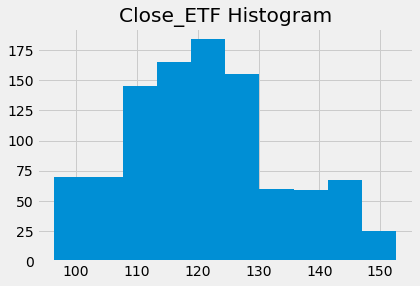

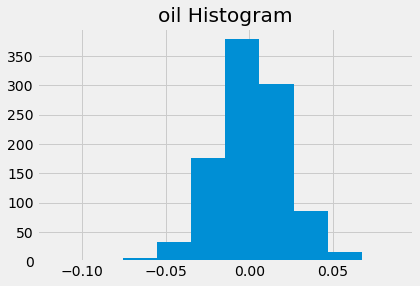

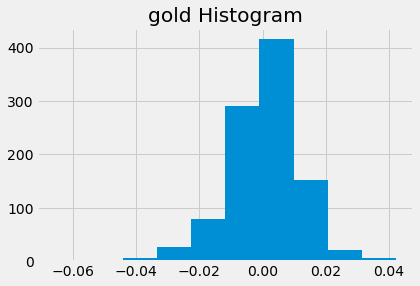

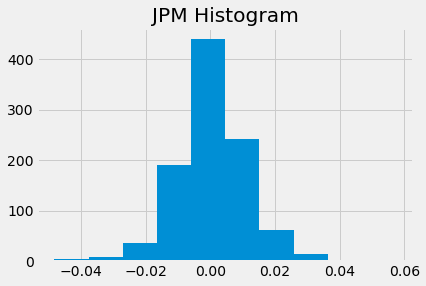

In [11]:
## Histogram
print("Histograms")
for col in df.columns:    
    plt.hist(df.loc[:, col])
    plt.title(f"{col} Histogram")
    plt.show() 

Time Series Plot


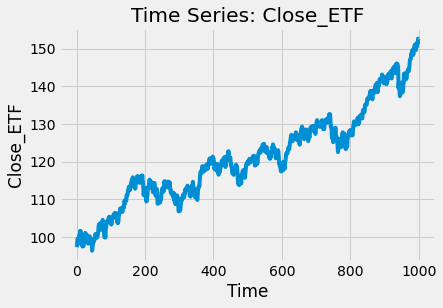

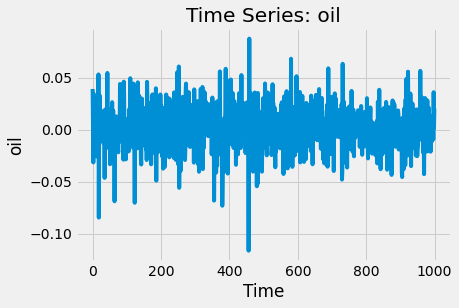

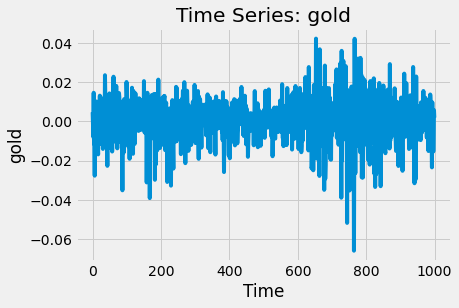

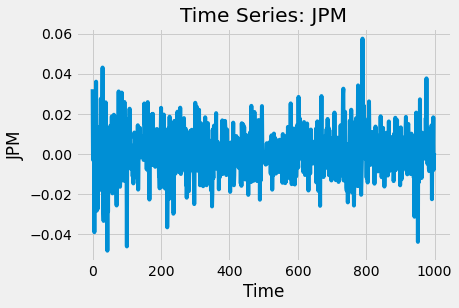

In [12]:
## Time Series Plot
print("Time Series Plot")
time_axis = range(df.shape[0])

for col in df.columns:
    plt.plot(time_axis, df.loc[:, col])
    plt.title(f'Time Series: {col}')
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.show()

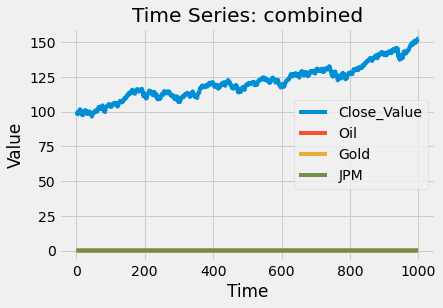

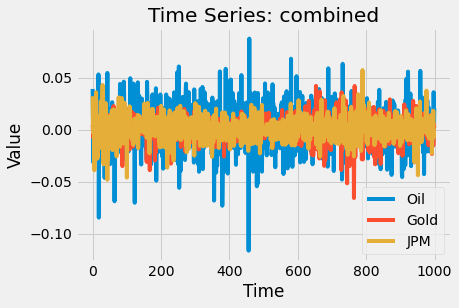

In [13]:
## Time Series Plot Combined
for col in df.columns:
    
    plt.plot(time_axis, df.loc[:, col])
    plt.title(f'Time Series: combined')
    plt.xlabel('Time')
    plt.ylabel("Value")
plt.legend([ "Close_Value", "Oil", "Gold", "JPM"])
plt.show()

for col in df.columns:
    if col == 'Close_ETF':
        continue 
    plt.plot(time_axis, df.loc[:, col])
    plt.title(f'Time Series: combined')
    plt.xlabel('Time')
    plt.ylabel("Value")
plt.legend([ "Oil", "Gold", "JPM"])
plt.show()

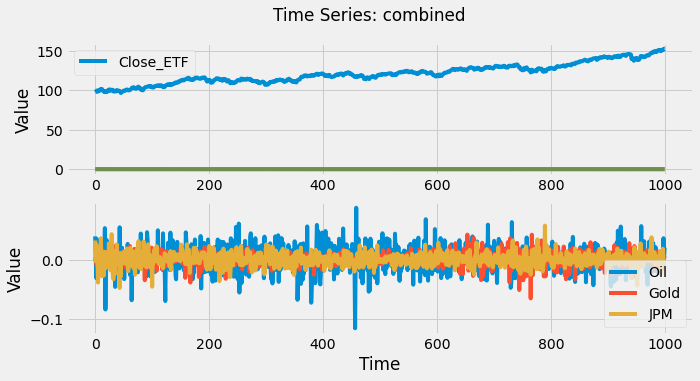

In [14]:
## Combined Time Series Plot

#plt.figure(1)
plt.figure(figsize=(10,5))
plt.subplot(211)
#plt.subplot(211, figsize=(15,15))
plt.plot(time_axis, df.loc[:, 'Close_ETF'])
plt.plot(time_axis, df.loc[:, 'oil'])
plt.plot(time_axis, df.loc[:, 'gold'])
plt.plot(time_axis, df.loc[:, 'JPM'])
plt.legend(['Close_ETF'])
plt.ylabel("Value")
plt.subplot(212)
plt.plot(time_axis, df.loc[:, 'oil'])
plt.plot(time_axis, df.loc[:, 'gold'])
plt.plot(time_axis, df.loc[:, 'JPM'])
plt.xlabel('Time')
plt.ylabel("Value")
plt.legend(["Oil", "Gold", "JPM"])
plt.suptitle('Time Series: combined')
#plt.title(f'Time Series: combined', y=-0.00)
plt.show()


Scatter Plot


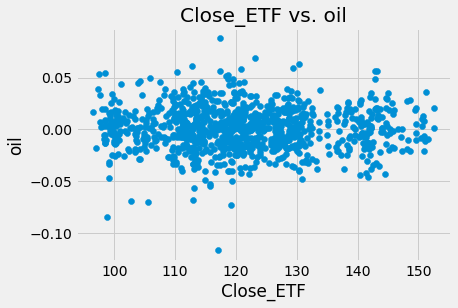

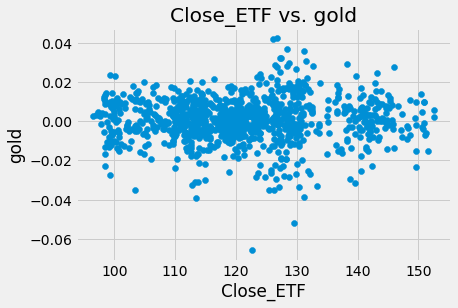

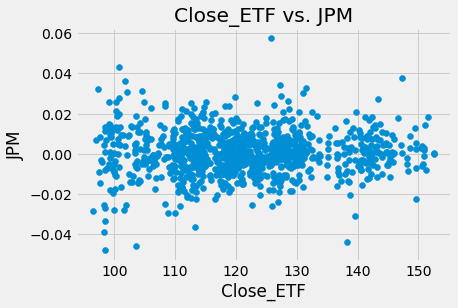

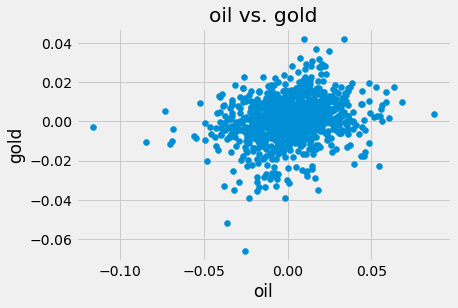

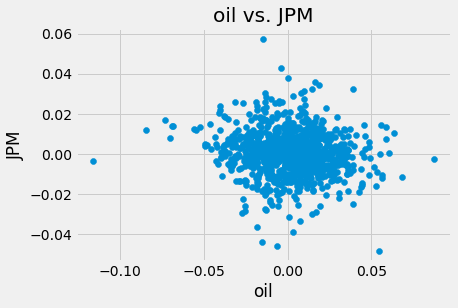

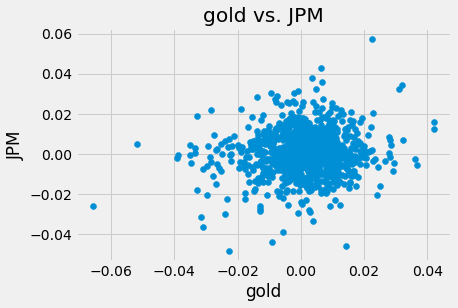

In [15]:
# Scatter Plot
print("Scatter Plot")
already_plotted = []
for col1 in df.columns:
    for col2 in df.columns:
        plot_group = (col1, col2)
        plot_group_rev = (col2, col1)
        if plot_group in already_plotted or plot_group_rev in already_plotted:
            continue
        elif col1 == col2:
            continue
        else:
            already_plotted.append(plot_group)
            plt.scatter(df.loc[:, col1], df.loc[:, col2])
            plt.title(f'{col1} vs. {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

## Part 3: What distribution does your data follow
Requirements – Propose an assumption/a hypothesis regarding the type of distribution each column of the data set may follow (i.e., the ETF, OIL, GOLD, and JPM column), based on the plots from Part 2. Then verify or object that assumption/hypothesis with appropriate tests (for example, normality test). You may use any software to perform those tests.

Histograms with Best Line Plots


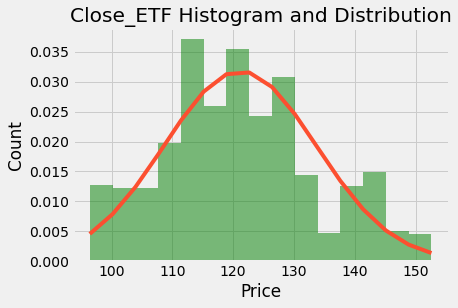

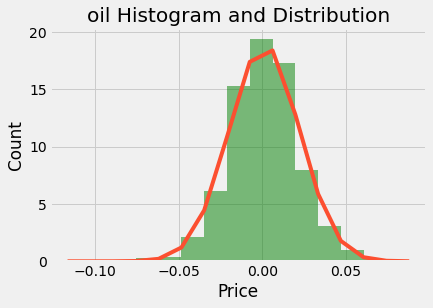

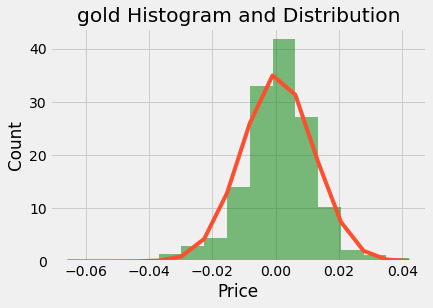

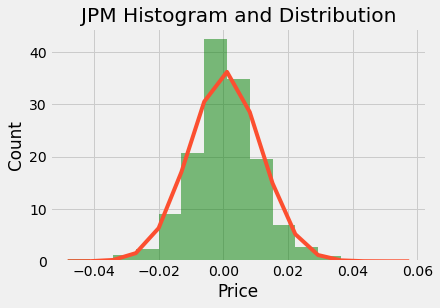

In [16]:
## Histogram with Best Fit Lines
print("Histograms with Best Line Plots")
bin_count = 15
for col in df.columns:
    vals = df.loc[:, col]
    _, bins, _ = plt.hist(vals, bin_count, density=1, alpha=0.5, facecolor='green')
    mu, sigma = scipy.stats.norm.fit(vals)
    best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
    plt.plot(bins, best_fit_line)
    plt.title(f"{col} Histogram and Distribution")
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show() 

In [17]:
# Hypothesis: JPM follows a normal distrubtion, in order to test run the following:
import scipy
"""
JPM - Normal 
ETF - right skewed 
Oil - left skewed
Gold - left skewed
"""

def normal_test(df, cat_name):
    """
    This is the normal test
    Input:
        df - data frame
        cat_name - column name
    """
    k2, p = scipy.stats.normaltest(df.loc[:, cat_name])
    #print(p)
    alpha = 1e-3
    compare_p_to_alpha(p= p, alpha = alpha, category = cat_name)
    return
    
# Hypothesis: JPM follows a normal distrubtion, in order to test run the following:
#cat = 'JPM', 'Close_ETF'

for col in df.columns:
    print()
    print(col)
    normal_test(df= df, cat_name= col)


Close_ETF
Conclusion: Reject the null hypotheis (H_0)
	Category: Close_ETF, p_value: 1.2734397418438873e-06, alpha: 0.001

oil
Conclusion: Reject the null hypotheis (H_0)
	Category: oil, p_value: 9.993623074366447e-10, alpha: 0.001

gold
Conclusion: Reject the null hypotheis (H_0)
	Category: gold, p_value: 1.0827873971023125e-23, alpha: 0.001

JPM
Conclusion: Reject the null hypotheis (H_0)
	Category: JPM, p_value: 4.4013170216572694e-12, alpha: 0.001


Test different distributions of scipy stats and find the best one that fits normalized histogram

In [18]:
# Distributions

%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
#import statsmodels as sm
#import matplotlib
import matplotlib.pyplot as plt

#%matplotlib inline  
plt.style.use('fivethirtyeight')

#dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']
#dist = getattr(scipy.stats, dist_name)

def best_fit_distribution(data, bins=200, ax=None):
    '''
    Model data by finding best fit distribution to data

    Parameters
    ----------
    data : pandas.core.series.Series
        series of values.
    bins : int, optional
        Number of bins to organize data into. The default is 200.
    ax : int or None, optional
        Axis [None, 0, 1]. The default is None.

    Returns
    -------
    TYPE
        DESCRIPTION.
    best_params : TYPE
        DESCRIPTION.
        
    https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python?lq=1
    Initial Author: tmthydvnprt
    Edited: nbenelli

    '''

    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]
    
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf
    
    #print(f"Testing {str(len(DISTRIBUTIONS))} different distributions from scipy.stats")

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:
        #print(distribution.name)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                        break
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse
                    #print(f"CURRENT BEST DIST: {distribution.name}")

        except Exception:
            pass
    
    print(f"BEST DIST: {distribution.name}")
    return (best_distribution.name, best_params)


def make_pdf(dist, params, size=10000):
    '''
    Generate distributions's Probability Distribution Function

    Parameters
    ----------
    dist : scipy.stats
        scipy.stats.{distribution} i.e. (scipy.stats._continuous_distns.johnsonsu_gen)
    params : tuple
        distribution parameters.
    size : int, optional
        Number of values in distribution. The default is 10000.

    Returns
    -------
    pdf : pandas.core.series.Series
        series of distribution.

    '''


    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf


def plot_hist_with_dist(data, bins= 50, axis_type= None):
    '''
    Plot data in histogram, find best distribution, create pdf, plot histogram, 
    plot normalized histogram with pdf

    Parameters
    ----------
    data : pandas.core.series.Series
        Pandas series of values.
    bins : int, optional
        Number of bins to organize data. The default is 50.
    axis_type : int or None, optional
        Axis [None, 0, 1]. The default is None.

    Returns
    -------
    final_params : dict
        dictionary of distribution and parameters.

    '''
    
    alpha = 0.5
    
    col_name = data.name
    # Best Fit
    best_fit_name, best_fit_params = best_fit_distribution(data, bins= bins, ax= axis_type)
    best_dist = getattr(st, best_fit_name)
    
    # PDF
    # Make PDF with best params 
    pdf = make_pdf(best_dist, best_fit_params, size = bins)
    
    
    # Plot
    plot_title = u'{} |n All Fitted Distribution'.format(col_name)
    plot_xlabel = u'Price'
    plot_ylabel = 'Frequency'
    
    # Plot for comparison
    plt.figure(figsize=(12,8))
    ax = data.plot(kind='hist', bins=bins, alpha=alpha)
    # Save plot limits
    dataYLim = ax.get_ylim()
    # Update plots
    ax.set_ylim(dataYLim)
    ax.set_title(plot_title)
    ax.set_xlabel(plot_xlabel)
    ax.set_ylabel(plot_ylabel)
    plt.show()
    
    
    
    # Plot With Distribution
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=bins,  alpha=alpha, label='Data', legend=True, ax=ax, density= True)
    param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
    dist_str = '{}({})'.format(best_fit_name, param_str)
    ax.set_title(u'{}. with best fit distribution \n{}'.format(col_name, dist_str))
    ax.set_xlabel(plot_xlabel)
    ax.set_ylabel(plot_ylabel)
    plt.show()
    
    final_params = {'dist_name' : best_fit_name}
    for cat, val in zip(param_names, best_fit_params):
        final_params[cat] = val
    
    return final_params





In [19]:


DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

print(f"Testing {str(len(DISTRIBUTIONS))} different distributions from scipy.stats")

Testing 86 different distributions from scipy.stats



Data: Close_ETF
BEST DIST: gumbel_r


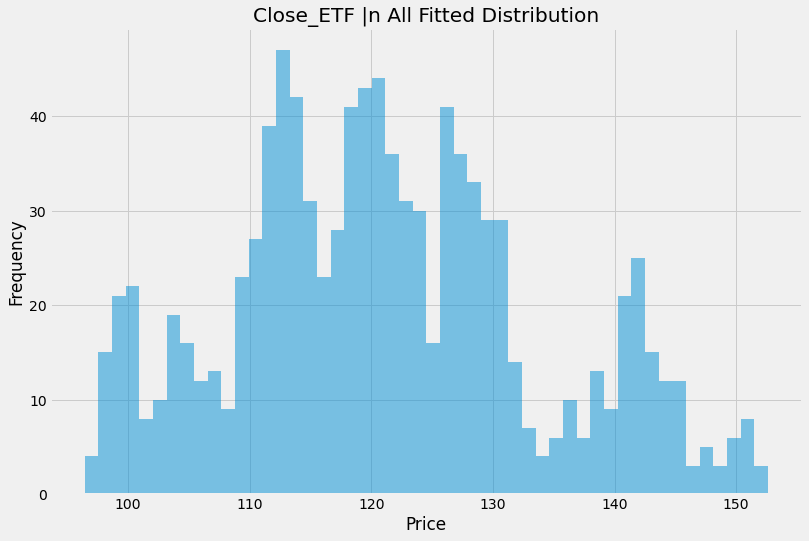

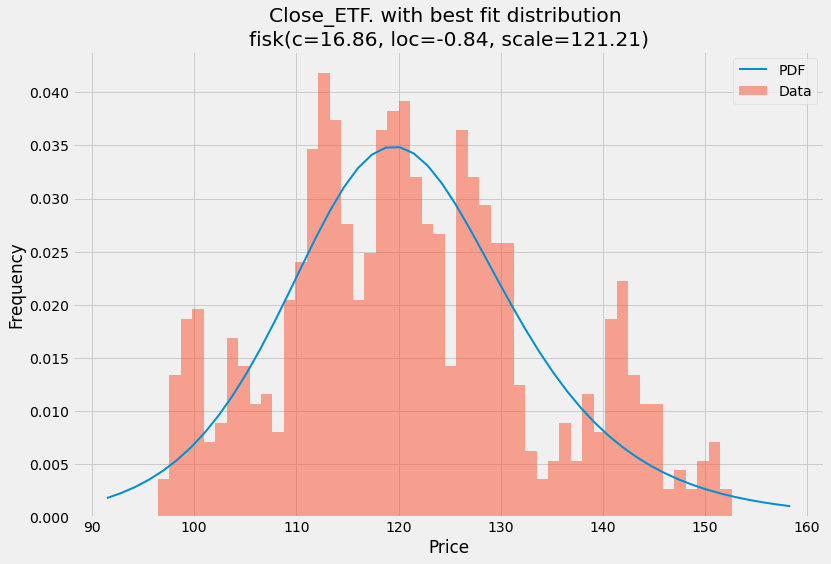


Data: oil
BEST DIST: gumbel_r


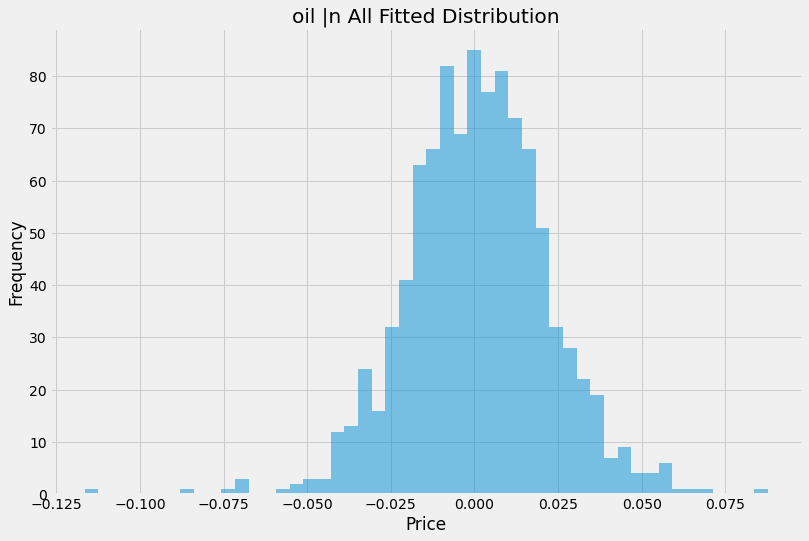

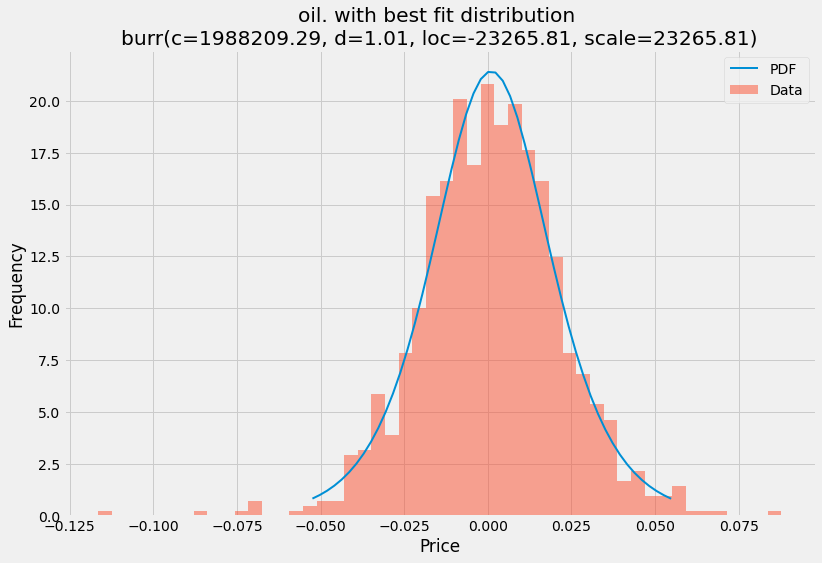


Data: gold
BEST DIST: gumbel_r


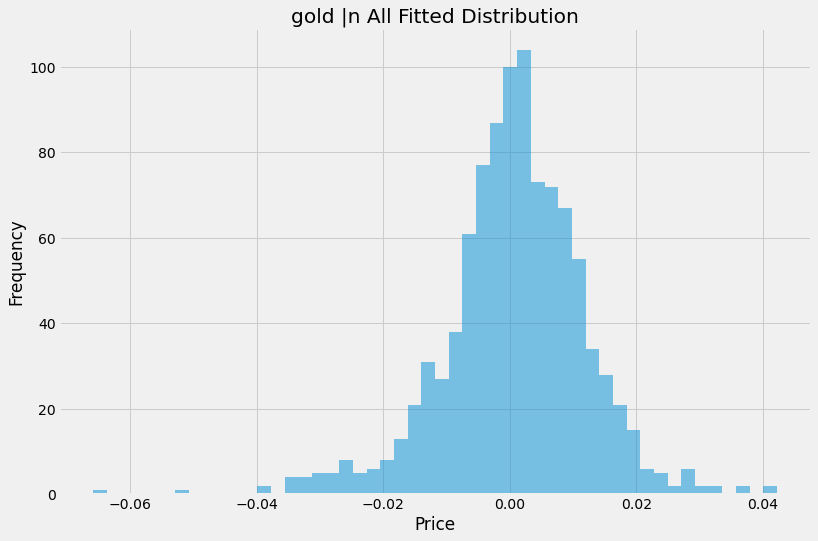

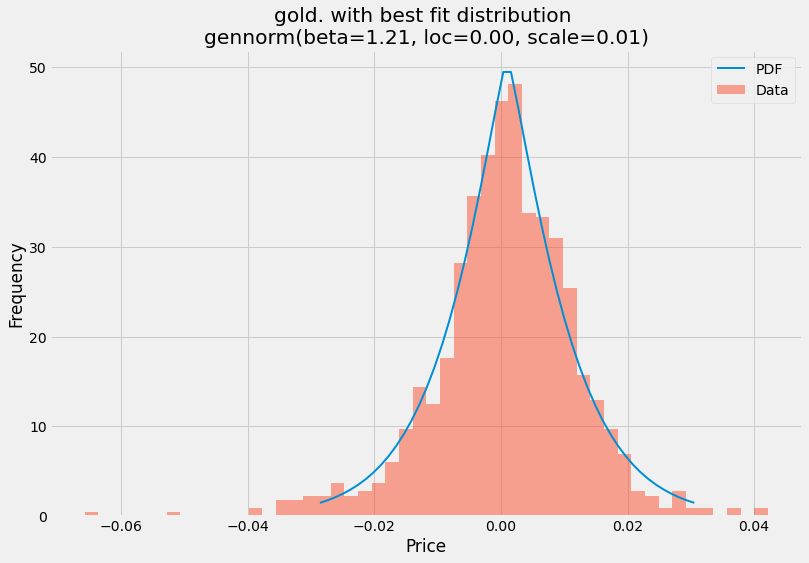


Data: JPM
BEST DIST: gumbel_r


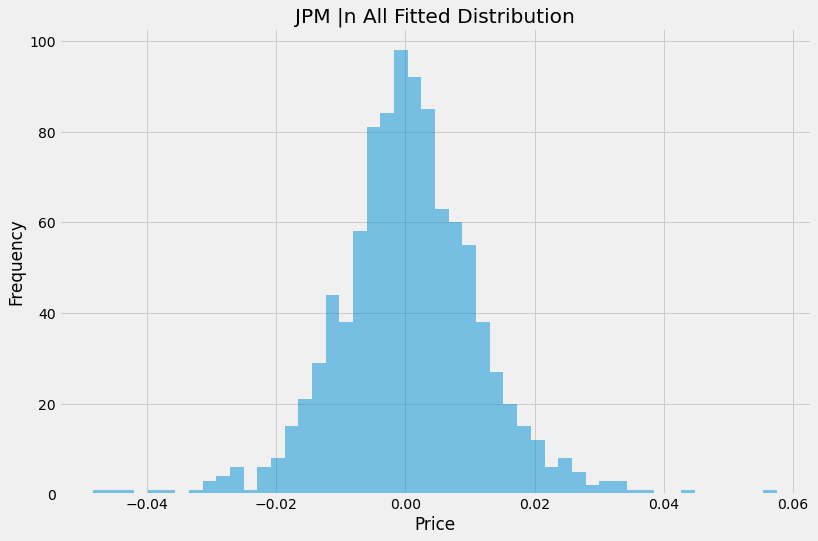

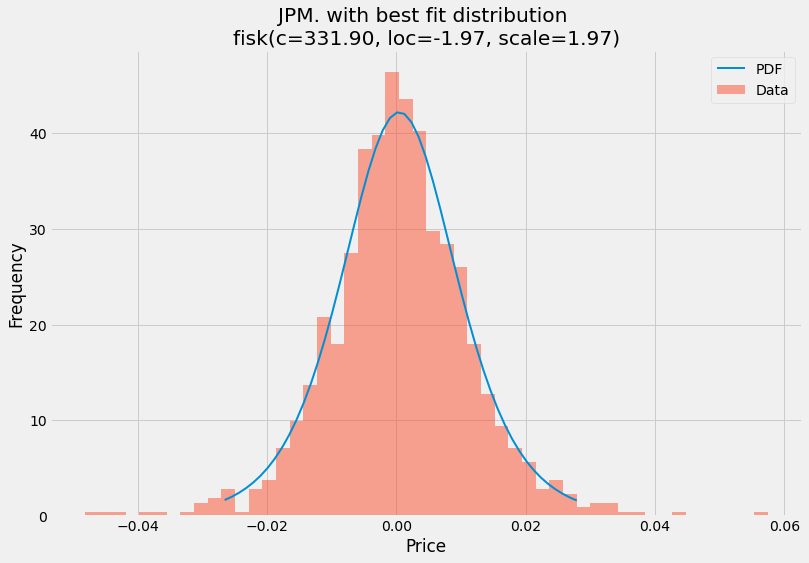

In [20]:
if run_major_functions:
    dist_values = {}
    for col in df:
        data = df.loc[:, col]
        print(f"\nData: {data.name}")
        dist_values[data.name] = plot_hist_with_dist(data, bins= 50)
    

In [21]:
if run_major_functions:
    df_values = pd.DataFrame(dist_values)
    display(df_values)

,Close_ETF,oil,gold,JPM
dist_name,fisk,burr,gennorm,fisk
c,16.857737,1988209.287174,NaN,331.901273
loc,-0.84493,-23265.811034,0.000976,-1.96709
scale,121.212528,23265.811964,0.010425,1.967573
d,NaN,1.007519,NaN,NaN
beta,NaN,NaN,1.208809,NaN


In [22]:
if run_major_functions:
    print('Distribution Parammeter Data Frame')
    df_values = pd.DataFrame(dist_values)
    display(df_values)

Distribution Parammeter Data Frame


,Close_ETF,oil,gold,JPM
dist_name,fisk,burr,gennorm,fisk
c,16.857737,1988209.287174,NaN,331.901273
loc,-0.84493,-23265.811034,0.000976,-1.96709
scale,121.212528,23265.811964,0.010425,1.967573
d,NaN,1.007519,NaN,NaN
beta,NaN,NaN,1.208809,NaN


## Part 4: Break your data into small groups and let them discuss the importance of the Central Limit Theorem
##### Requirements – Consider the ETF column (1000 values) as the population (x), and do the follows. Any software may be used.

#### 1) Calculate the mean 𝜇! and the standard deviation 𝜎! of the population.
#### 2) Break the population into 50 groups sequentially and each group includes 20 values.
#### 3) Calculate the sample mean (𝑥) of each group. Draw a histogram of all the sample means. 
    Comment on the distribution of these sample means, i.e., use the histogram to assess the  normality of the data consisting of these sample means.
#### 4) Calculate the mean (𝜇!) and the standard deviation (𝜎!) of the data including these sample means. 
    Make a comparison between 𝜇! and 𝜇! , between #! and 𝜎! . Here, 𝑛 is √% the number of  sample means calculated from Item 3) above.

#### 5) Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?
#### 6) Break the population into 10 groups sequentially and each group includes 100 values.
#### 7) Repeat Items 3) ~ 5).

In [23]:
def group_data_sequentially(data, groups, return_mean_series= True):

    count_in_group = int(data.size /groups)
    
    group_df = {}
    mean_list = []
    
    for idx  in range(groups):   
        start_idx = int(idx * count_in_group)
        df2 = data.iloc[start_idx:(start_idx+count_in_group)]
        x_mean_x2 = df2.mean()
        mean_list.append(x_mean_x2)
        group_df[idx] = {'df' : df2, 'mean' : x_mean_x2, 'std' : df2.std()}
    
    
    mean_series = pd.Series(mean_list, name= '20 Mean')
    if return_mean_series:
        output = mean_series
    else:
        output = group_df
    return  output


In [24]:
col_name = 'Close_ETF'
data = df.loc[:, col_name]

# Overall 
print(f'{col_name} Info:')
print(data.describe())
mean_x = data.mean()
std_x = data.std()
print("\n")

Close_ETF Info:
count    1000.000000
mean      121.152960
std        12.569790
min        96.419998
25%       112.580002
50%       120.150002
75%       128.687497
max       152.619995
Name: Close_ETF, dtype: float64




Group Number: 50
count     50.000000
mean     121.152960
std       12.615973
min       99.154001
25%      112.348375
50%      120.279250
75%      128.367875
max      150.350499
Name: 20 Mean, dtype: float64
Overall Mean: 121.1529600120001, 
 Sample Mean : 121.15296001200001

Overall Std: 1.7776367936987165, 
Sample Std : 12.615972812491504



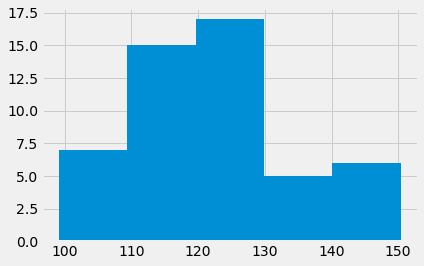

Conclusion: Fail to reject the null hypothesis (H_0)
	Category: 50 Group, p_value: 0.5556665153303884, alpha: 0.001


In [25]:
# Group 50
group_count = 50
print(f'Group Number: {group_count}')
mean_series_50 = group_data_sequentially(data, groups= group_count, return_mean_series= True)


print(mean_series_50.describe())
mean_x2 = mean_series_50.mean()
std_x2 = mean_series_50.std()
# Make a comparison between 𝜇! and 𝜇! , between #! and 𝜎! . Here, 𝑛 is √%
# the number of sample means calculated from Item 3) above
print(f'Overall Mean: {mean_x}, \n Sample Mean : {mean_x2}\n')
print(f'Overall Std: {std_x / (group_count ** (1/2)) }, \nSample Std : {std_x2}\n')

plt.hist(mean_series_50, bins= 5)
plt.show()


k2, p = scipy.stats.normaltest(mean_series_50)
alpha = 1e-3
compare_p_to_alpha(p= p, alpha = alpha, category = "50 Group")

# Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?

Group Number: 10
count     10.000000
mean     121.152960
std       12.821726
min      100.774300
25%      112.642875
50%      120.038550
75%      127.455925
max      144.472000
Name: 20 Mean, dtype: float64
Overall Mean: 121.1529600120001, 
Sample Mean : 121.152960012

Overall Std: 3.9749167100151, 
Sample Std : 12.821725528306809



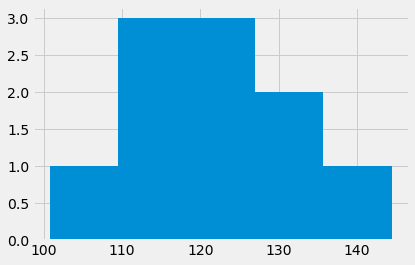

Conclusion: Fail to reject the null hypothesis (H_0)
	Category: 10 Group, p_value: 0.8603152479102059, alpha: 0.001


/Users/nickbenelli/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [26]:
# Group 10
group_count = 10
print(f'Group Number: {group_count}')
mean_series_10 = group_data_sequentially(data, groups= group_count, return_mean_series= True)


print(mean_series_10.describe())
mean_x2 = mean_series_10.mean()
std_x2 = mean_series_10.std()
# Make a comparison between 𝜇! and 𝜇! , between #! and 𝜎! . Here, 𝑛 is √%
# the number of sample means calculated from Item 3) above
print(f'Overall Mean: {mean_x}, \nSample Mean : {mean_x2}\n')
print(f'Overall Std: {std_x / (group_count ** (1/2)) }, \nSample Std : {std_x2}\n')

plt.hist(mean_series_10, bins= 5)
plt.show()

k2, p = scipy.stats.normaltest(mean_series_10)
alpha = 1e-3

compare_p_to_alpha(p= p, alpha = alpha, category = "10 Group")


### Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why? 
They are since when we run the normality test on the 50 and 10 Group with the null hypothesis, we see that
We cannot reject the hypothesis which means the distributions of sample means follow a normal distrubtion
which by definintion proves the Central Limit Theorem

#### 8) Generate 50 simple random samples or groups (with replacement) from the population.
The size of each sample is 20, i.e., each group includes 20 values.
#### 9) Repeat Items 3) ~ 5).

#### 10) Generate 10 simple random samples or groups (with replacement) from the population.
The size of each sample is 100, i.e., each group includes 100 values.
#### 11) Repeat Items 3) ~ 5).

In [27]:
# Random Variable
from random import sample


def group_data_randomnly(data, groups, return_mean_series= True):

    count_in_group = int(data.size /groups)
    
    group_df = {}
    mean_list = []
    df2 = sample(list(data), count_in_group)

    
    for idx  in range(groups):   
        df2 = sample(list(data),count_in_group)
        x_mean_x2 = np.mean(df2)
        mean_list.append(x_mean_x2)
        group_df[idx] = {'df' : df2, 'mean' : x_mean_x2, 'std' : np.std(df2)}
    
    
    mean_series = pd.Series(mean_list, name= '20 Mean')
    if return_mean_series:
        output = mean_series
    else:
        output = group_df
    return  output

In [28]:
col_name = 'Close_ETF'
data = df.loc[:, col_name]
print()

# Overall 
print(f'{col_name} Info')
print(data.describe())
mean_x = data.mean()
std_x = data.std()
print("\n")


Close_ETF Info
count    1000.000000
mean      121.152960
std        12.569790
min        96.419998
25%       112.580002
50%       120.150002
75%       128.687497
max       152.619995
Name: Close_ETF, dtype: float64




Group Number: 50
count     50.000000
mean     121.589020
std        3.007449
min      115.161501
25%      119.580999
50%      121.419500
75%      123.481376
max      127.499999
Name: 20 Mean, dtype: float64
Overall Mean: 121.1529600120001, 
 Sample Mean : 121.58902011200007

Overall Std: 1.7776367936987165, 
Sample Std : 3.0074487395207363



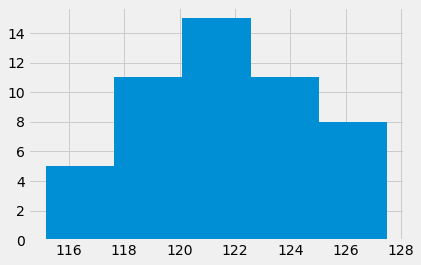

Conclusion: Fail to reject the null hypothesis (H_0)
	Category: 50 Random Group, p_value: 0.905963994639794, alpha: 0.001


In [29]:
# Group 50
group_count = 50
print(f'Group Number: {group_count}')
mean_series_rand_50 = group_data_randomnly(data, groups= group_count, return_mean_series= True)

print(mean_series_rand_50.describe())
mean_x2 = mean_series_rand_50.mean()
std_x2 = mean_series_rand_50.std()
# Make a comparison between 𝜇! and 𝜇! , between #! and 𝜎! . Here, 𝑛 is √%
# the number of sample means calculated from Item 3) above
print(f'Overall Mean: {mean_x}, \n Sample Mean : {mean_x2}\n')
print(f'Overall Std: {std_x / (group_count ** (1/2)) }, \nSample Std : {std_x2}\n')

plt.hist(mean_series_rand_50, bins= 5)
plt.show()


k2, p = scipy.stats.normaltest(mean_series_rand_50)
alpha = 1e-3
compare_p_to_alpha(p= p, alpha = alpha, category = "50 Random Group")


Group Number: 10
count     10.000000
mean     121.398500
std        1.132771
min      119.432600
25%      121.351500
50%      121.614000
75%      121.886575
max      123.272900
Name: 20 Mean, dtype: float64
Overall Mean: 121.1529600120001, 
Sample Mean : 121.398500044

Overall Std: 3.9749167100151, 
Sample Std : 1.1327711281518162



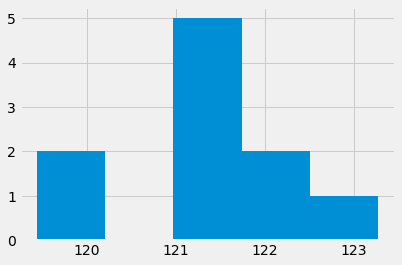

Conclusion: Fail to reject the null hypothesis (H_0)
	Category: 10 Random Group, p_value: 0.5048017621647555, alpha: 0.001


In [30]:
# Group 10
group_count = 10
print(f'Group Number: {group_count}')
mean_series_rand_10 = group_data_randomnly(data, groups= group_count, return_mean_series= True)


print(mean_series_rand_10.describe())
mean_x2 = mean_series_rand_10.mean()
std_x2 = mean_series_rand_10.std()
# Make a comparison between 𝜇! and 𝜇! , between #! and 𝜎! . Here, 𝑛 is √%
# the number of sample means calculated from Item 3) above
print(f'Overall Mean: {mean_x}, \nSample Mean : {mean_x2}\n')
print(f'Overall Std: {std_x / (group_count ** (1/2)) }, \nSample Std : {std_x2}\n')

plt.hist(mean_series_rand_10, bins= 5)
plt.show()

k2, p = scipy.stats.normaltest(mean_series_rand_10)
alpha = 1e-3
compare_p_to_alpha(p= p, alpha = alpha, category = "10 Random Group")

#### 12) In Part 3 of the project, you have figured out the distribution of the population (the entire ETF column). Does this information have any impact on the distribution of the sample mean(s)? Explain your answer.

Part 12: No it the distrubutions should not affect the sample mean distribution. This is because it follows the central limit therom. The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacementtext annotation indicator, then the distribution of the sample means will be approximately normally distributed.

In [31]:
#### 12) Part 5: Construct a confidence interval with your data
#### Requirements –
####   1) Pick up one of the 10 simple random samples you generated in Step 10) of Part 4,
####    construct an appropriate 95% confidence interval of the mean �. 

## Part 5: Construct a confidence interval with your data Requirements –
#### 1) Pick up one of the 10 simple random samples you generated in Step 10) of Part 4, construct an appropriate 95% confidence interval of the mean 𝜇.
#### 2) Pick up one of the 50 simple random samples you generated in Step 8) of Part 4, construct an appropriate 95% confidence interval of the mean 𝜇.
#### 3) In Part 1, you have calculated the mean 𝜇 of the population (the entire ETF column) using Excel function. Do the two intervals from 1) and 2) above include (the true value of) the mean 𝜇? Which one is more accurate? Why?


In [32]:
'''
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h
'''
print(scipy.stats.norm.interval(alpha=0.95, loc=np.mean(mean_series_rand_50), scale=st.sem(mean_series_rand_50)))

print(scipy.stats.norm.interval(alpha=0.95, loc=np.mean(mean_series_rand_10), scale=st.sem(mean_series_rand_10)))


(120.75541317007259, 122.42262705392756)
(120.69641412603347, 122.10058596196653)


121.152960 was the mean of the entire ETF data set. This value is contianed within both our confidence intervals 
for the group of 10 and group of 50. I believe the 50 group would be more accurate as it contains more of the inital ETF data
which allows the sample mean and std to be close to the actual mean and std


## Part 6: Form a hypothesis and test itwith your data Requirements –
#### 1)   Use the same sample you picked up in Step 1) of Part 5 to testvs.𝑯𝟎:  𝝁=𝟏𝟎𝟎 vs 𝑯𝒂: 𝝁≠𝟏𝟎𝟎 at the significance level 0.05. What’s your conclusion? 
#### 2)   Use the same sample you picked up in Step 2) of Part 5 to testvs.𝑯𝟎:  𝝁=𝟏𝟎𝟎 vs 𝑯𝒂:  𝝁≠𝟏𝟎𝟎 at the significance level 0.05. What’s your conclusion?: 
#### 3)   Use the same sample you picked up in Step 2) of Part 5 to testvs.𝑯𝟎:  𝝈=𝟏𝟓 vs 𝑯𝒂:  𝝈≠𝟏𝟓 at the significance level 0.05. What’s your conclusion?: 
#### 4)   Use the same sample you picked up in Step 2) of Part 5 to testvs.𝑯𝟎:  𝝈=𝟏𝟓 vs 𝑯𝒂:  𝝈<𝟏𝟓 at the significance level 0.05. What’s your conclusion?

In [33]:
#One Sample, 2 tailed T-test
from scipy import stats as st
def ttest(sample,mu,alpha):
    stats, p = st.ttest_1samp(sample,mu)
    print(f'Statistics: {stats}')
    compare_p_to_alpha(p= p, alpha = alpha, category = "")
    return
    


In [34]:
print(mean_series_rand_10.head())
print()
ttest(mean_series_rand_10,100,.05)

0    121.6879
1    121.9528
2    121.4874
3    123.2729
4    122.0262
Name: 20 Mean, dtype: float64

Statistics: 59.73669081825706
Conclusion: Reject the null hypotheis (H_0)
	p_value: 5.202655347656385e-13, alpha: 0.05


In [35]:
print(mean_series_rand_50.head())
print()

ttest(mean_series_rand_50,100,.05)

0    118.615000
1    121.178000
2    121.333001
3    121.925001
4    125.403000
Name: 20 Mean, dtype: float64

Statistics: 50.75977628400307
Conclusion: Reject the null hypotheis (H_0)
	p_value: 4.982443721988554e-44, alpha: 0.05


In [36]:
#Use the same sample you picked up in Step 2) of Part 5 to testvs.
#𝑯𝟎: 𝝈=𝟏𝟓 vs 𝑯𝒂: 𝝈≠𝟏𝟓 at the significance level 0.05. What’s your conclusion?:

#F Test
from scipy import stats as st
alpha = 0.05 #Or whatever you want your alpha to be.
sigma = 15
var_null = sigma^2
var_sample = np.var(mean_series_rand_50)
print(f'(var_null, var_sample): {var_null,var_sample}')
dfn=len(mean_series_rand_50)-1
p_value = st.f.cdf(var_null/var_sample, dfn,10)

compare_p_to_alpha(p= round(p_value, 4), alpha = alpha, category = "")


(var_null, var_sample): (13, 8.863852962427968)
Conclusion: Fail to reject the null hypothesis (H_0)
	p_value: 0.7358, alpha: 0.05


In [37]:
from statsmodels.stats import weightstats as stests

def ztest(sample,x2,value,alpha):
    ztest ,p_value = stests.ztest(sample, x2, value)
    print(f'ztest Statistics: {ztest}')
    compare_p_to_alpha(p= round(p_value, 4), alpha = alpha, category = "")
    return None

In [38]:
ztest(mean_series_rand_50,None,15,.05)

ztest Statistics: 250.61048566113
Conclusion: Reject the null hypotheis (H_0)
	p_value: 0.0, alpha: 0.05


## Part 7: Compare your data with a different data set Requirements –
#### 1)   Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05. 
#### 2)  Subtract the entire Gold column from the entire Oil column and generate a sample of differences. Consider this sample as a random sample from the target population of differences between Gold and Oil. Form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.
#### 3)   Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal standard deviations in the significance level 0.05.

In [39]:
# Packages
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [40]:
# Two Tail, Two Sample, T test

gold_list = df.gold.values.tolist()
oil_list = df.oil.values.tolist()
ttest,p_value = ttest_ind(gold_list,oil_list)
compare_p_to_alpha(p= p_value, alpha = 0.05, category = "Gold vs Oil")


Conclusion: Fail to reject the null hypothesis (H_0)
	Category: Gold vs Oil, p_value: 0.6274695258306375, alpha: 0.05


In [41]:
# Two Tail, Two Sample, T test
#difference_list = map(operator.sub, gold_list, oil_list)
alpha = 0.05

dfc = pd.DataFrame({'gold_list':gold_list,'oil_list':oil_list})
dfc['difference_list'] = dfc['gold_list'] - dfc['oil_list']
difference=dfc.difference_list.values.tolist()



print('difference vs oil')
ttest,p_value = ttest_ind(difference,oil_list)
compare_p_to_alpha(p= p_value, alpha = alpha, category = "difference vs oil")
print()

print('difference vs gold')
ttest,p_value = ttest_ind(difference,gold_list)
compare_p_to_alpha(p= p_value, alpha = alpha, category = "difference vs gold")

difference vs oil
Conclusion: Fail to reject the null hypothesis (H_0)
	Category: difference vs oil, p_value: 0.14206890190875107, alpha: 0.05

difference vs gold
Conclusion: Fail to reject the null hypothesis (H_0)
	Category: difference vs gold, p_value: 0.17917808424826281, alpha: 0.05


In [42]:
# One Tail, Two Sample, f test
F, p_value = f_oneway(gold_list, oil_list)

    
compare_p_to_alpha(p= p_value, alpha = 0.05, category = "difference vs gold")

Conclusion: Fail to reject the null hypothesis (H_0)
	Category: difference vs gold, p_value: 0.6274695258308237, alpha: 0.05


## Part 8: Fitting the line to the data  –
#### 1) Draw a scatter plot of ETF (Y) vs. Gold (X). Is there any linear relationship between them which can be observed from the scatter plot
#### 2) Calculate the coefficient of correlation between ETF and Gold and interpret it.
#### 3) Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are the intercept and slope of this line? How to interpret them?
#### 4) Conduct a two-tailed t-test with〖 H〗_0:  β_1=0. What is the P-value of the test? Is the linear relationship between ETF (Y) and Gold (X) significant at the significance level 0.01? Why or why not?
#### 5) Suppose that you use the coefficient of determination to assess the quality of this fitting. Is it a good model? Why or why not?
#### 6) What are the assumptions you made for this model fitting?
#### 7)	Given the daily relative change in the gold price is 0.005127. Calculate the 99% confidence interval of the mean daily ETF return, and the 99% prediction interval of the individual daily ETF return. 


Close_ETF
oil
gold
JPM


Text(0, 0.5, 'Close ETF')

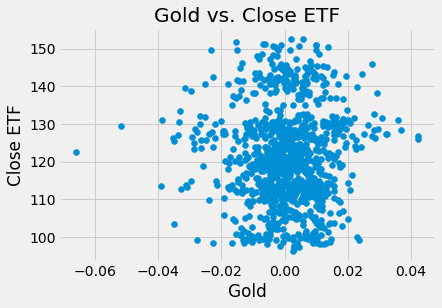

In [43]:
# Part 1
for col2 in df.columns:
    print(col2)
    
#Plot Close ETF(Y) vs. Gold (X)
plt.scatter(df['gold'], df['Close_ETF'])
plt.title(f'Gold vs. Close ETF')
plt.xlabel('Gold')
plt.ylabel('Close ETF')
#plt.show()

In [44]:
# Part 2
#Calculate Pearson's correlation for Gold and Close ETF
gold_close_etf_corr, _ = scipy.stats.pearsonr(df.loc[:, 'gold'], df.loc[:, 'Close_ETF'])
#print('Pearsons correlation: %.3f' % corr)
print (f'Pearson Corr Gold & Close ETF: {gold_close_etf_corr}')

Pearson Corr Gold & Close ETF: 0.022995570076054597


/Users/nickbenelli/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gold', ylabel='Close_ETF'>

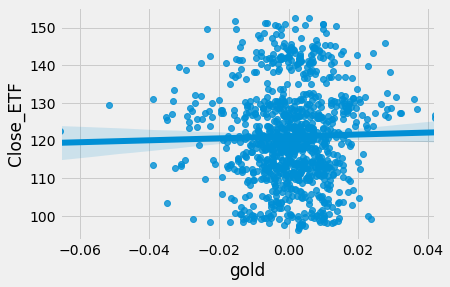

In [45]:
# Part 3
sns.regplot(df.loc[:, 'gold'], df.loc[:, 'Close_ETF'])

In [46]:
# Part 4
ttest,p_value = stats.ttest_ind(df.loc[:,'Close_ETF'],df.loc[:,'gold'], equal_var = True)
compare_p_to_alpha(p= p_value, alpha = 0.01, category = "T-Test, Close ETF vs Gold")


Conclusion: Reject the null hypotheis (H_0)
	Category: T-Test, Close ETF vs Gold, p_value: 0.0, alpha: 0.01


##### Since the  p-value is not significantly different from zero the correlation coefficient is not significant

In [47]:
# Part 5/Part 6
r_2 = sklearn.metrics.r2_score(df.loc[:,'Close_ETF'],df.loc[:,'gold'])
print(f'Close_ETF vs Gold R_2: {r_2}')

Close_ETF vs Gold R_2: -92.99113815628421


##### Since the coefficient of determination is close to 100 it is a good model for this fitting. Assumptions that were made during this model fitting were the following: 

1. The data are continuous (not discrete).
2. The data follows a normal probability distribution.
3. The variances of the two populations are equal.
4. The two datasets are independent. There is no relationship between the individuals in one sample as compared to the other.
5. Both samples are simple random samples from their respective populations. Each individual in the population has an equal probability of being selected in the sample.

In [48]:
# Part 7
#st.t.interval(alpha=0.99, df = df.loc[:,'Close_ETF'], loc = .005127, scale = st.sem(df.loc[:,'Close_ETF'])) 
lb, ub = scipy.stats.norm.interval(alpha=0.99, loc=.005127, scale=st.sem(df.loc[:,'Close_ETF']))
print(lb, ub)

# Fit Regression Line
b1, b0, r_value, p_value, std_err = stats.linregress(df.loc[:,'Close_ETF'], df.loc[:,'gold'])
# make predictions
yhat = .005127
# define new input, expected value and prediction
x_in = df['Close_ETF']
y_out = df['gold']
yhat_out = yhat
# estimate stdev of yhat
sum_errs = np.sum((df['Close_ETF'] - yhat)**2)
stdev = np.sqrt(1/(len(df['Close_ETF'])-2) * sum_errs)
# calculate prediction interval
interval = 2.576 * stdev
print('Prediction Interval: %.3f' % interval)
lower, upper = yhat_out - interval, yhat_out + interval
print('99%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value:', y_out)

-1.0187436940823082 1.0289976940823085
Prediction Interval: 314.065
99% likelihood that the true value is between -314.060 and 314.070
True value: 0      0.004668
1     -0.001366
2     -0.007937
3      0.014621
4     -0.011419
         ...   
995    0.004634
996   -0.015325
997   -0.006195
998    0.005778
999    0.001965
Name: gold, Length: 1000, dtype: float64


In [49]:
regressor = LinearRegression()
mapie = MapieRegressor(regressor)
alpha = .99

#X,Y = make_regression(n_samples = 500, n_features = 1, noise = 20, random_state = 59)

X = df['gold'].to_numpy().reshape(-1,1)
Y = df['Close_ETF'].to_numpy().reshape(-1)

print(f'X shape: {X.shape}')
print(f'Y shape: {Y.shape}')
mapie.fit(X,Y)
y_pred, y_pis = mapie.predict(X,alpha = alpha)
print(f'Y predicted shape: {y_pred.shape}',f'Y pis shape: {y_pis.shape}')

X shape: (1000, 1)
Y shape: (1000,)
Y predicted shape: (1000,) Y pis shape: (1000, 2, 1)


## Part 9: Does your model predict? Requirements –
Consider the data including the ETF, Gold and Oil column. Using any software, fit a multiple linear regression model to the data with the ETF variable as the response. Evaluate your model with adjusted 𝑅*.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
plt.style.use('fivethirtyeight')


In [51]:
# Get X and y
x_variables = ['gold', 'oil']
y_variables = ['Close_ETF']

df_X = df.loc[:, x_variables]
df_y = df.loc[:, y_variables]

#Step[0] Bring the data in a matrix
data_mat = df.values
print (f'Data shape: {data_mat.shape}')

X = df_X.values
y = df_y.values

Data shape: (1000, 4)


### Singular Regression R Values

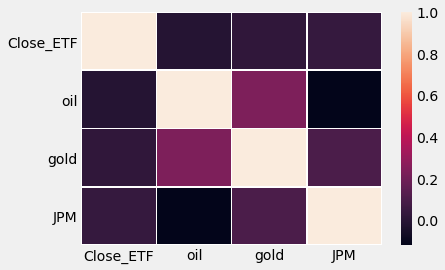

In [52]:
ax = sns.heatmap(df.corr(), linewidths=.5)

From the heatmap we cannot really see any strong predictors

In [53]:
display(df)

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855
...,...,...,...,...
995,150.570007,0.009752,0.004634,0.003859
996,151.600006,-0.009341,-0.015325,0.018259
997,151.300003,0.036120,-0.006195,-0.007928
998,152.619995,0.001542,0.005778,-0.000381


In [54]:
print('Correlations:')
df.loc[:, (x_variables + y_variables)].corr()

Correlations:


,gold,oil,Close_ETF
gold,1.000000,0.235650,0.022996
oil,0.235650,1.000000,-0.009045
Close_ETF,0.022996,-0.009045,1.000000


In [55]:
lr = LinearRegression()


for i, col_x in enumerate(x_variables):
    print(col_x)
    # TRAIN THE MODEL
    x_single_r =  df.loc[:, col].values.reshape(-1,1)
    y_single_r = df.loc[:, y_variables[0]].values.reshape(-1,1)

    #print(x_single_r.shape)
    #print(y_single_r.shape)

    lr.fit(x_single_r, y_single_r)

    # WHAT ARE THESE COEFFICIENTS and INTERCEPTS?
    print (f'\tSlopes: {lr.coef_}')
    print (f'\tIntercept: {lr.intercept_}')
    # R^2 : Coefficient of determination. Goodness of fit
    print (f'\t{col}, Close_ETF: {lr.score(x_single_r, y_single_r)}')
    print()

gold
	Slopes: [[41.99649416]]
	Intercept: [121.13068461]
	JPM, Close_ETF: 0.0013547594989302691

oil
	Slopes: [[41.99649416]]
	Intercept: [121.13068461]
	JPM, Close_ETF: 0.0013547594989302691



### Multi Var Linear Regression Model 

In [56]:
random_state = 100 #100
test_size =  0.2 #0.2
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [57]:
# Preprocess: Normalize the Features
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_n = scaler.transform(X_train) # Is built on training data
X_test_n = scaler.transform(X_test) # Same normalizer used for test data too

In [58]:
lr = LinearRegression()

# TRAIN THE MODEL
lr.fit(X_train_n, y_train)

# WHAT ARE THESE COEFFICIENTS and INTERCEPTS?
print (f'Slopes: {lr.coef_}')
print (f'Intercept: {lr.intercept_}')


Slopes: [[1.71777463 0.12031737]]
Intercept: [120.29745674]


In [59]:
# Predict on some new values of x
y_pred = lr.predict(X_test_n)
print (np.round(y_pred[1:6],2))
print (y_test[1:6])

[[121.5 ]
 [121.31]
 [121.22]
 [121.36]
 [121.32]]
[[109.860001]
 [123.019997]
 [120.230003]
 [121.589996]
 [105.989998]]


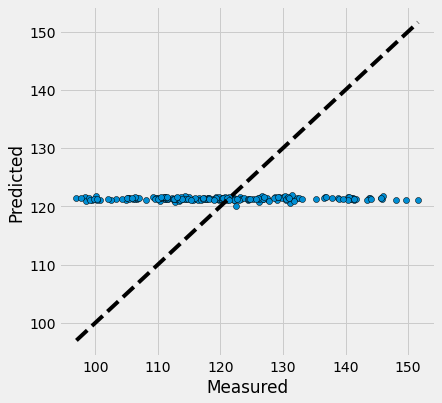

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [61]:
# R^2 : Coefficient of determination. Goodness of fit
print (f'X_train, y_train R2: {lr.score(X_train_n, y_train)}')
print (f'X_train, y_train R2: {lr.score(X_test_n, y_test)}')

X_train, y_train R2: 0.00027320146919340704
X_train, y_train R2: -0.004328874507137481


#### Conclusion:
Ultimatley the model is not very predictive. This would make sense, because none of the 1:1 R square values are very predictive

### Anova Table

In [62]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['oil', 'gold', 'Close_ETF'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']
display(df_melt)

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
#import matplotlib.pyplot as plt
#import seaborn as sns
#ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
#ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
#plt.show()

,index,treatments,value
0,0,oil,0.039242
1,1,oil,0.001953
2,2,oil,-0.031514
3,3,oil,0.034552
4,4,oil,0.013619
...,...,...,...
2995,995,Close_ETF,150.570007
2996,996,Close_ETF,151.600006
2997,997,Close_ETF,151.300003
2998,998,Close_ETF,152.619995


In [63]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['oil'], df['gold'], df['Close_ETF'])
print(f'f value: {fvalue}, p_value: {pvalue}')

f value: 92897.56939151397, p_value: 0.0


In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),9.785223e+06,2.0,92897.569392,0.0
Residual,1.578422e+05,2997.0,NaN,NaN


In [65]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
#from bioinfokit.analys import stat
import bioinfokit.analys
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res =  bioinfokit.analys.stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,oil,gold,0.000367,-0.760668,0.761403,0.001600,0.900
1,oil,Close_ETF,121.151930,120.390894,121.912966,527.912742,0.001
2,gold,Close_ETF,121.152297,120.391262,121.913333,527.914342,0.001


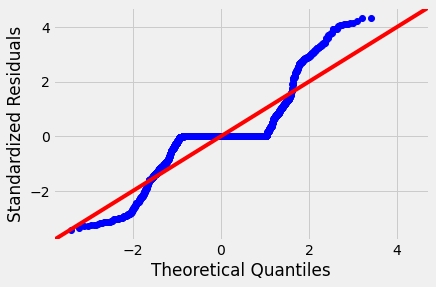

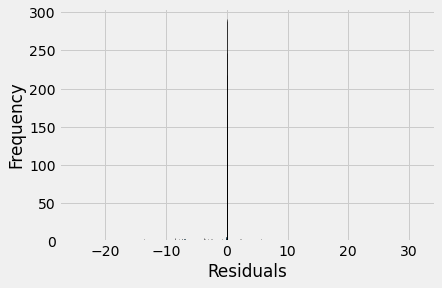

In [66]:
# QQ-plot
import statsmodels.api as sm
#import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

## Part 10: Checking residuals and model selection
### Requirements –
Calculate the residuals of the model fitting you did in Part 9. Check the four assumptions made
for the error terms of the multiple regression model using these residuals (mean 0; constant
variance; normality; and the independence). You may draw some plots over the residuals to
check these assumptions. For example, draw a Normal Probability Plot to check the normality
assumption; draw a scatter plot of Residuals vs. Fitted Values to check the constant variance
assumption and the independence assumption; and so on. You may refer to the following link
https://www.youtube.com/watch?v=4zQkJw73U6I for some hints. In your project report, all the
relevant plots and at least one paragraph of summary of checking the four assumptions using
those plots must be included.
Discuss how you may improve the quality of your regression model according to the strategy of
model selection. 

### Residual Plots

In [67]:
resid = y_test - y_pred
X_test_n.shape

(200, 2)

0


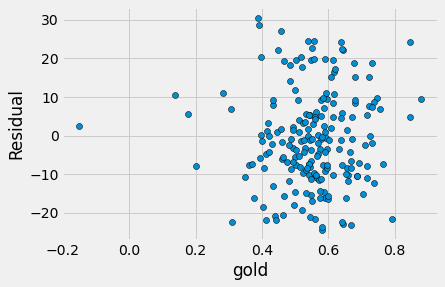

1


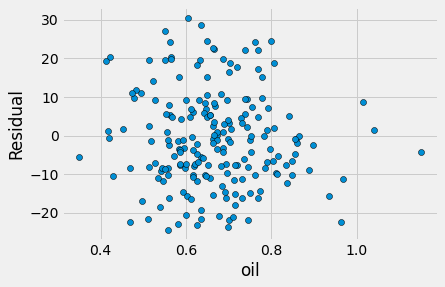

In [68]:

for i, x_test_n_col in enumerate(X_test_n.transpose()):
    print(i)
    x_test_n_array_col = X_test_n[:, i]
    fig, ax = plt.subplots()
    #fig.set_size_inches(6,6)
    ax.scatter(x_test_n_array_col, resid, edgecolors=(0, 0, 0))
    ax.set_xlabel(x_variables[i])
    ax.set_ylabel('Residual')
    plt.show()

    

#### Over Time

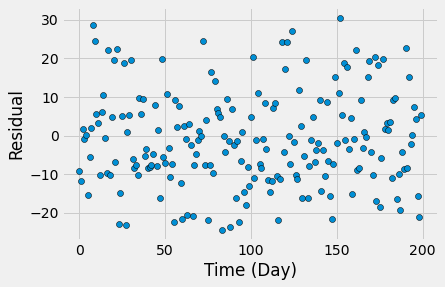

In [69]:
df_resid = pd.DataFrame(resid)
df_resid.head()

fig, ax = plt.subplots()
#fig.set_size_inches(6,6)
ax.scatter(df_resid.index, resid, edgecolors=(0, 0, 0))
ax.set_xlabel('Time (Day)')
ax.set_ylabel('Residual')
plt.show()

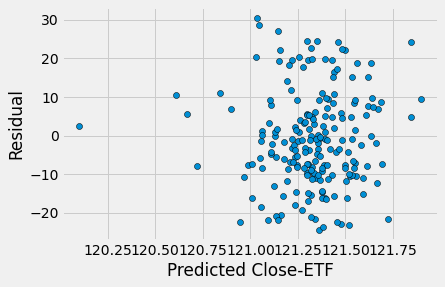

In [70]:
fig, ax = plt.subplots()
#fig.set_size_inches(6,6)
ax.scatter(y_pred, resid, edgecolors=(0, 0, 0))
ax.set_xlabel('Predicted Close-ETF')
ax.set_ylabel('Residual')
plt.show()

### Linearity Test 

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [[29.62259178 -9.12609977]]
Intercept: [121.1427253]
R^2 score: 0.0007502966608660122


In [72]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3743
Date:                Wed, 04 Aug 2021   Prob (F-statistic):              0.688
Time:                        20:29:57   Log-Likelihood:                -3949.4
No. Observations:                1000   AIC:                             7905.
Df Residuals:                     997   BIC:                             7919.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1427      0.399    303.856      0.000     120.360     121.925
x1            29.6226     36.272      0.817      0.414     -41.555     100.800
x2            -9.1261     19.413     -0.470      0.638     -47.221      28.968
==============================================================================
Omnibus:                       26.565   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.981
Skew:                           0.306   Prob(JB):                     1.02e-05
Kurtosis:                       2.579   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

In [74]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

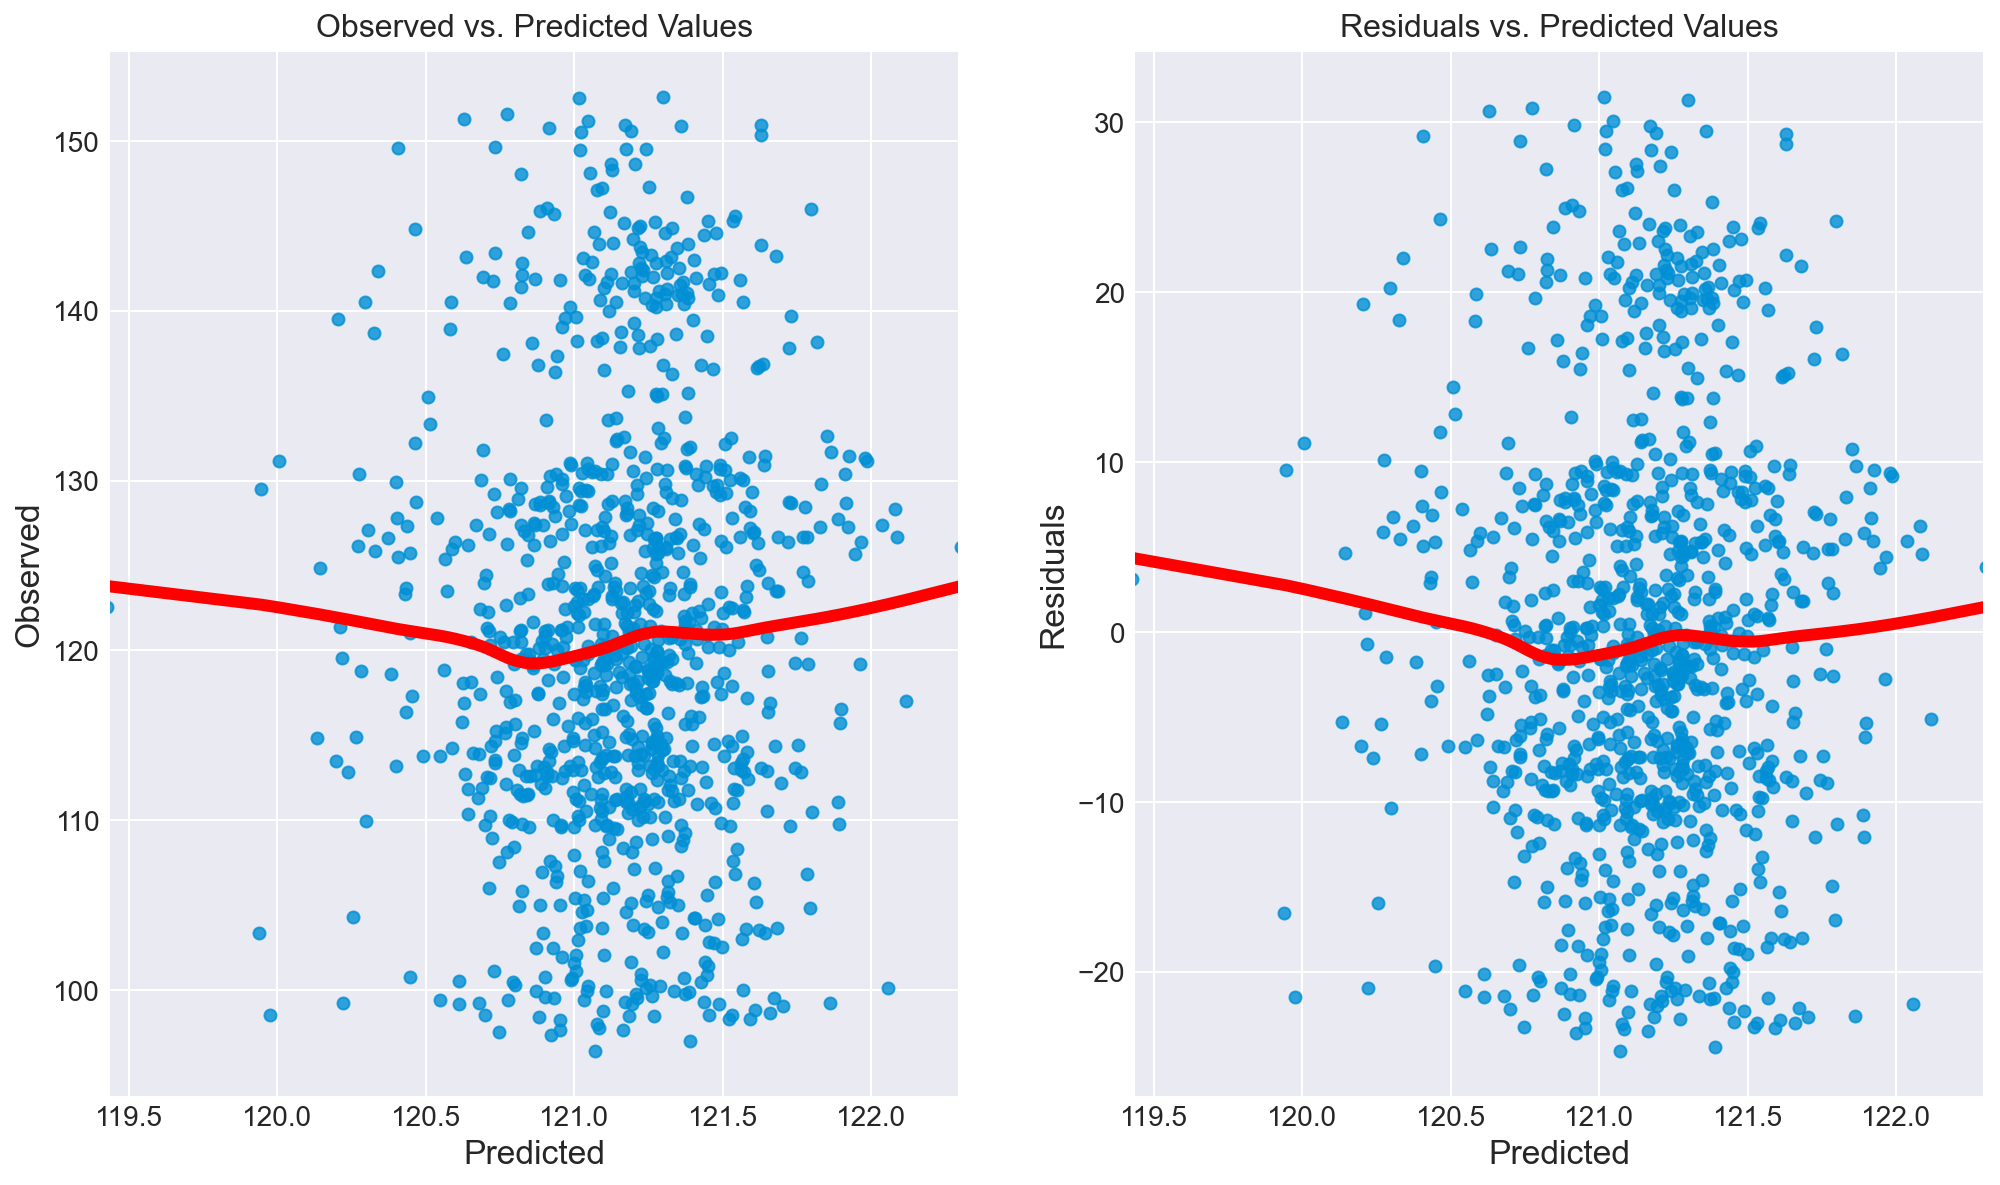

In [75]:
linearity_test(lin_reg, y)  

In [76]:
lin_reg.resid.mean()

3.637978807091713e-15

According to the Gauss–Markov theorem, in a linear regression model the ordinary least squares (OLS) estimator gives the best linear unbiased estimator (BLUE) of the coefficients, provided that:

#### Homoscedasticity (equal variance) of residuals


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  0.093360
p-value                        0.954393
f-value                        0.046544
f p-value                      0.954525

 Goldfeld-Quandt test ----
                    value
F statistic  1.738851e+00
p-value      4.536050e-10

 Residuals plots ----


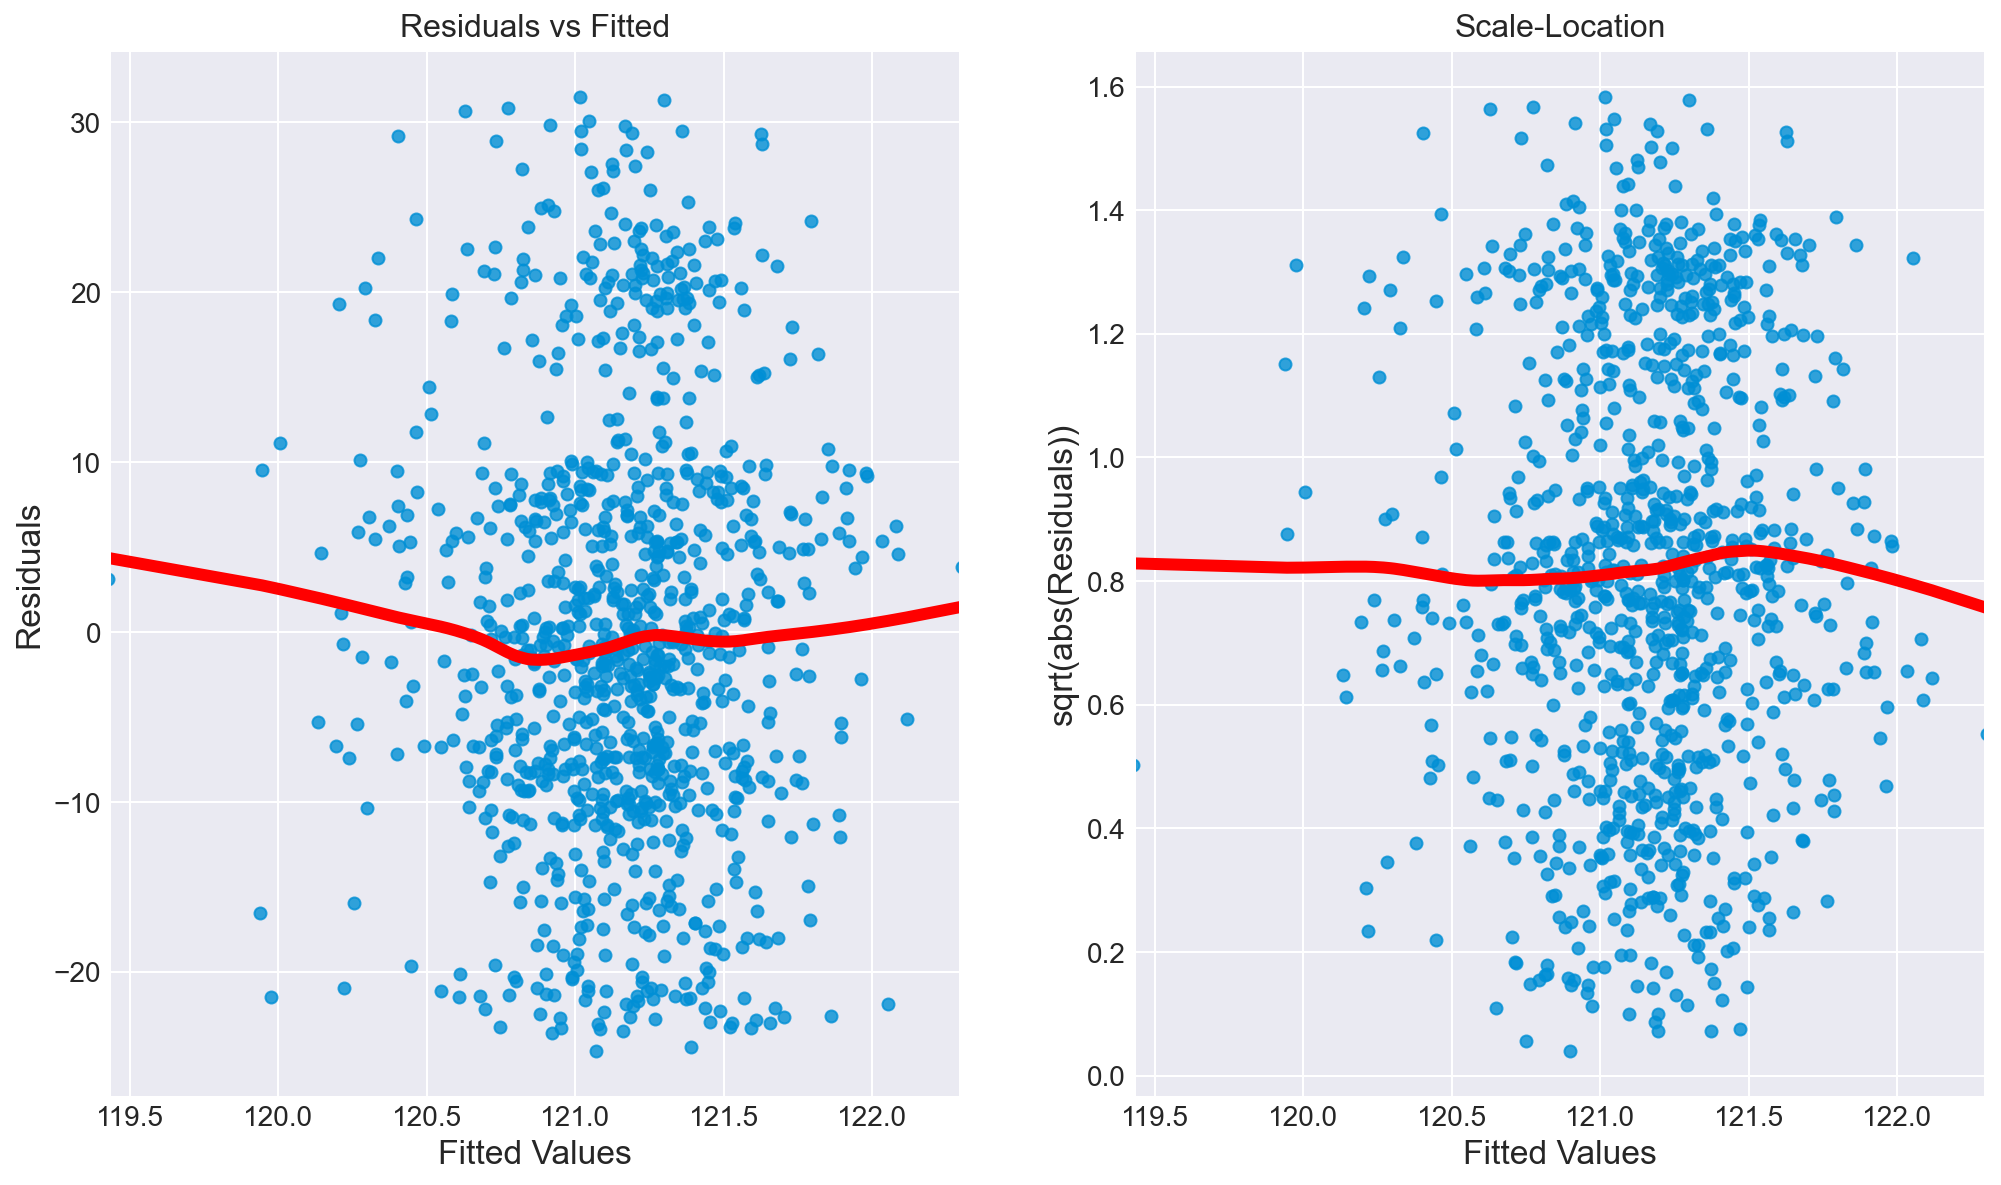

In [79]:

%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

### No autocorrelation of residuals 

<ipython-input-80-1dd21ae0b56e>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


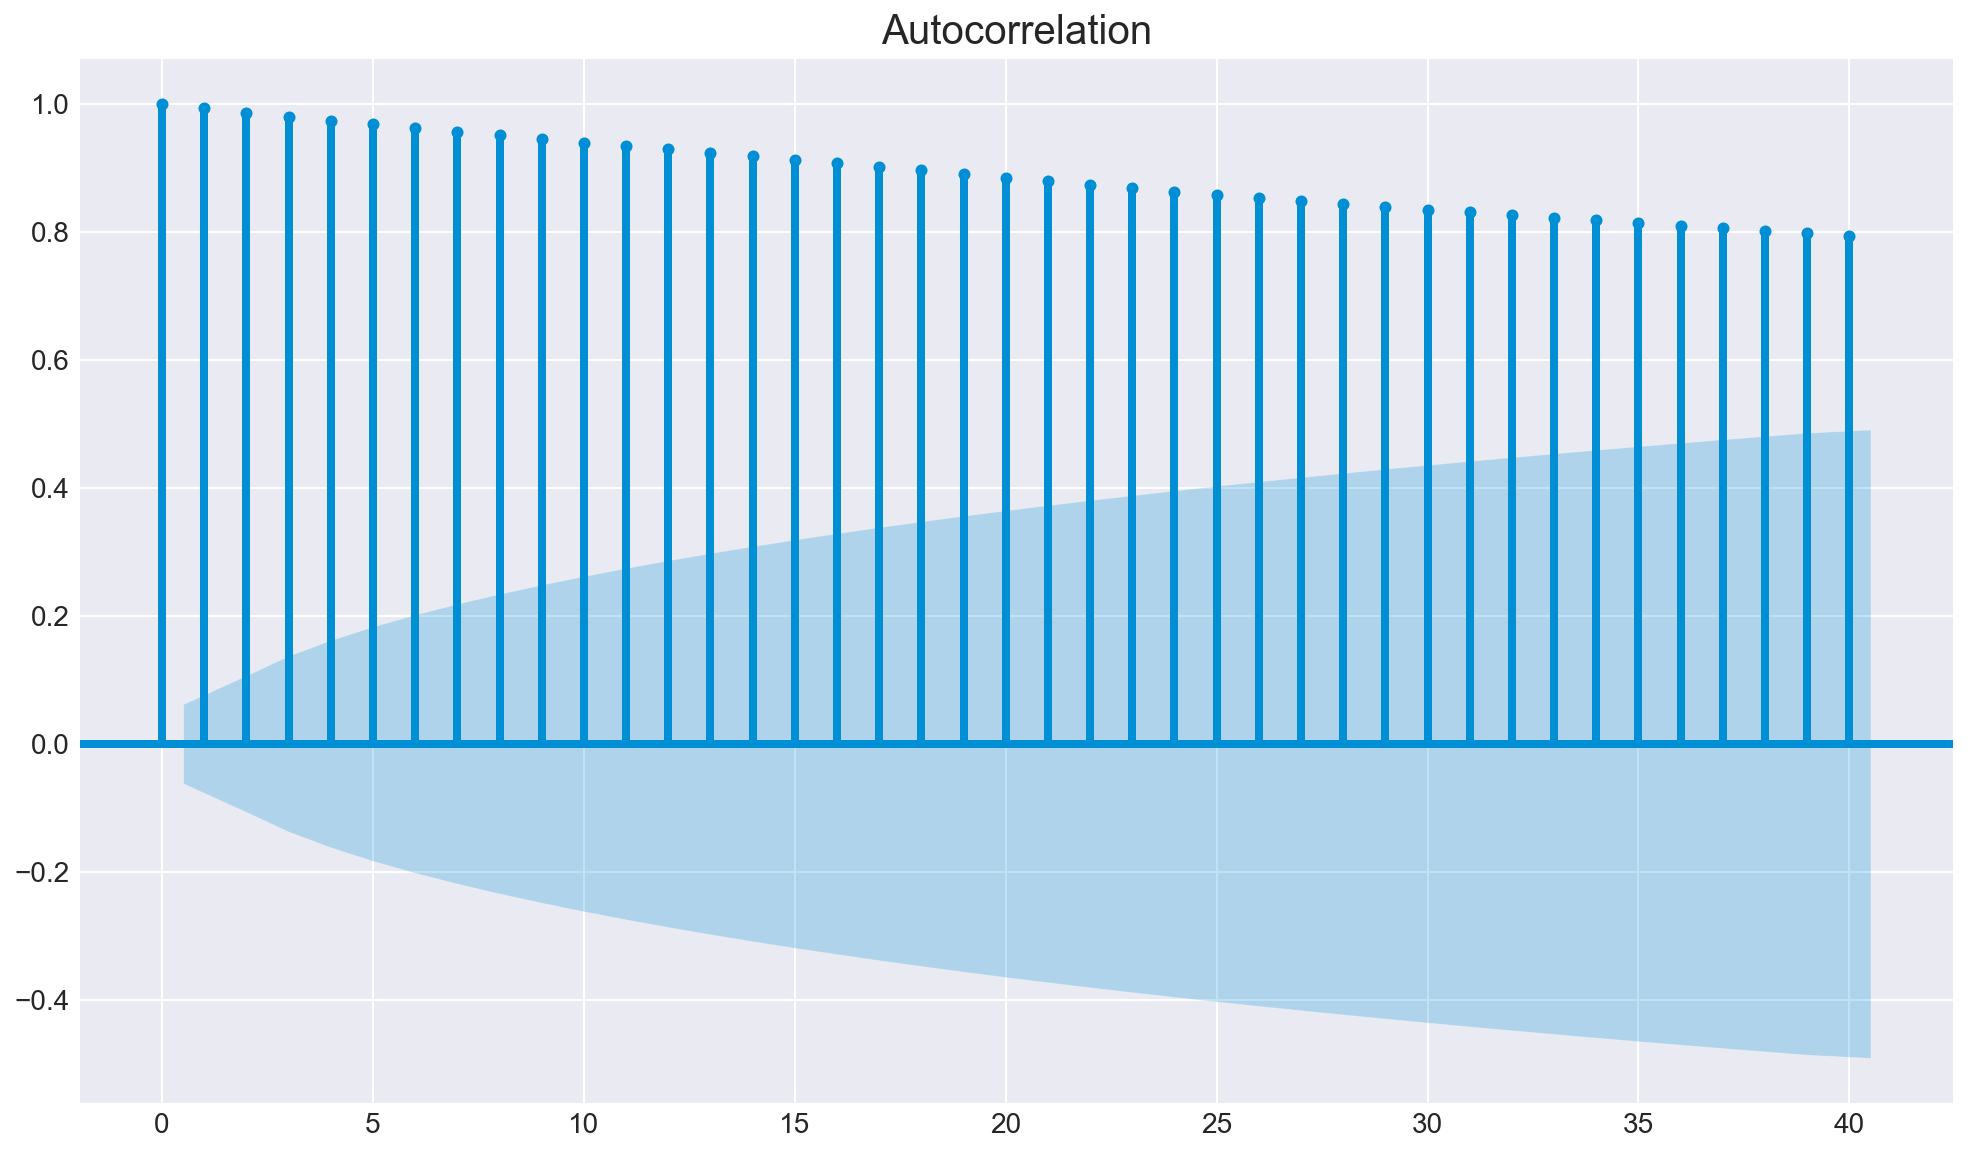

In [80]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

Jarque-Bera test ---- statistic: 22.9812, p-value: 1.0225921772577529e-05
Shapiro-Wilk test ---- statistic: 0.9797, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.4407, p-value: 0.0000
Anderson-Darling test ---- statistic: 4.6274, 5% critical value: 0.7840
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


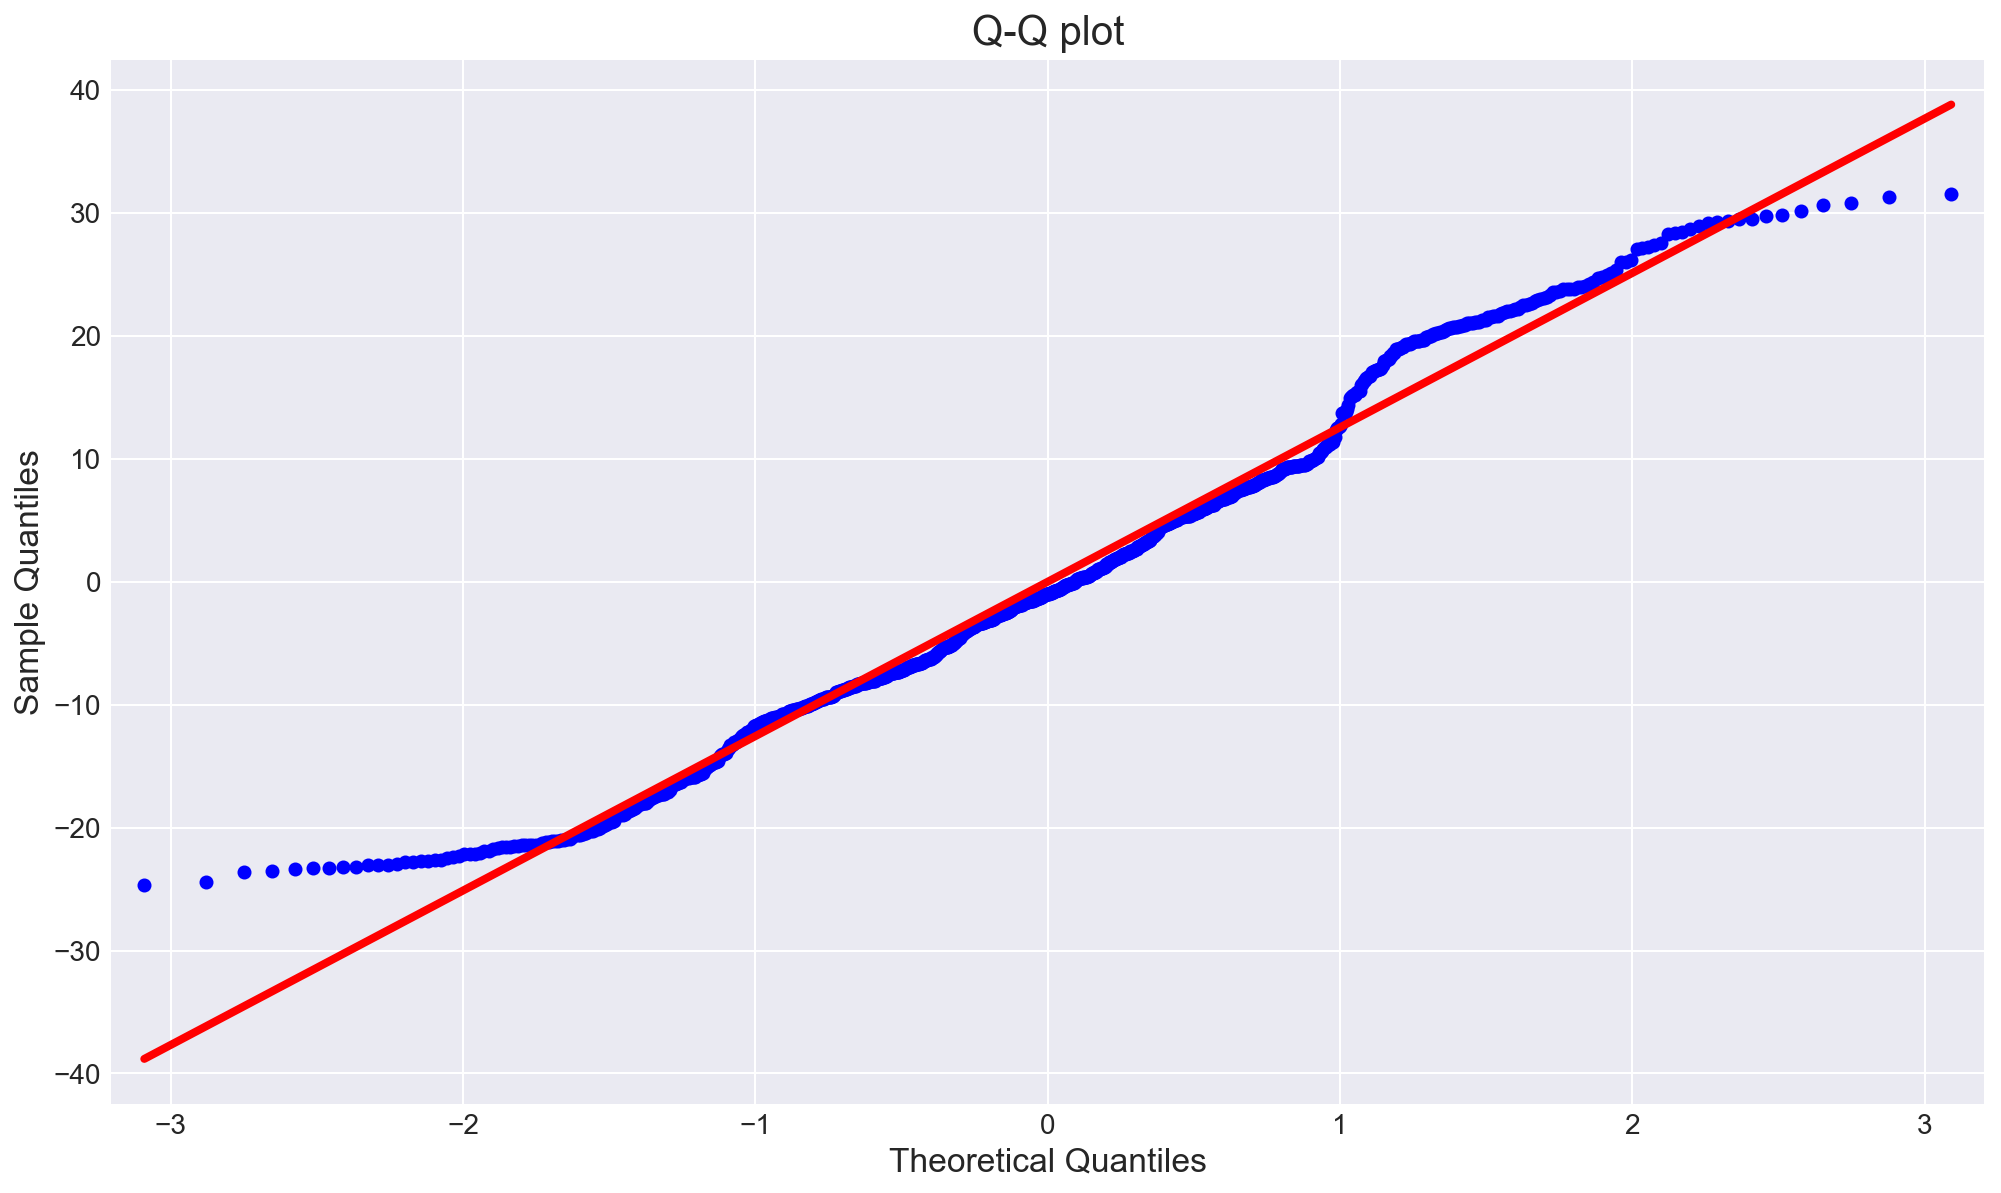

In [81]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)